Nelson Leonardo Izaguirre Pazzety 20211023730


Alejandro Josue Sanchez Martinez 20211023045


Marlon Javier Chinchilla Coello

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import truncnorm
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [6]:
# Cargar el dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.dtypes

age                                int64
gender                            object
weight (kg)                      float64
height (m)                       float64
max_bpm                            int64
avg_bpm                            int64
resting_bpm                        int64
session_duration (hours)         float64
calories_burned                  float64
workout_type                      object
fat_percentage                   float64
water_intake (liters)            float64
workout_frequency (days/week)      int64
experience_level                   int64
bmi                              float64
dtype: object

In [9]:
#Estadisticas descriptivas para las variables numéricas

num_cols = []

for c in df.columns:
    if (df[c].dtype == 'int64' or df[c].dtype =='float64'):    
        num_cols.append(c)

num_cols

['age',
 'weight (kg)',
 'height (m)',
 'max_bpm',
 'avg_bpm',
 'resting_bpm',
 'session_duration (hours)',
 'calories_burned',
 'fat_percentage',
 'water_intake (liters)',
 'workout_frequency (days/week)',
 'experience_level',
 'bmi']

In [10]:
num_cols_df = pd.DataFrame(df[num_cols])
num_cols_df.head(2)

,age,weight (kg),height (m),max_bpm,avg_bpm,resting_bpm,session_duration (hours),calories_burned,fat_percentage,water_intake (liters),workout_frequency (days/week),experience_level,bmi
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.2
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.0


In [11]:
num_cols_df.describe()

,age,weight (kg),height (m),max_bpm,avg_bpm,resting_bpm,session_duration (hours),calories_burned,fat_percentage,water_intake (liters),workout_frequency (days/week),experience_level,bmi
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


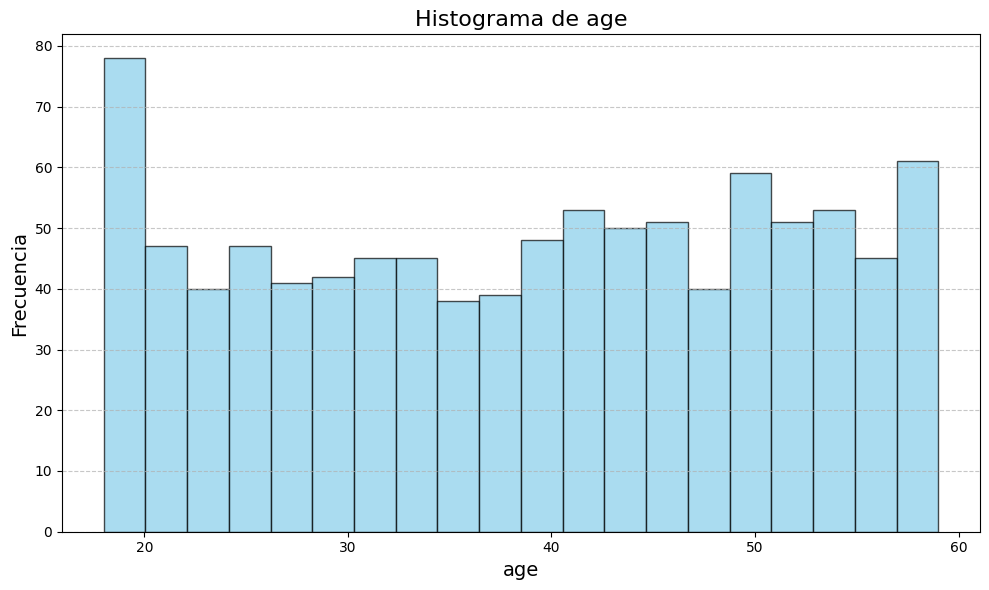

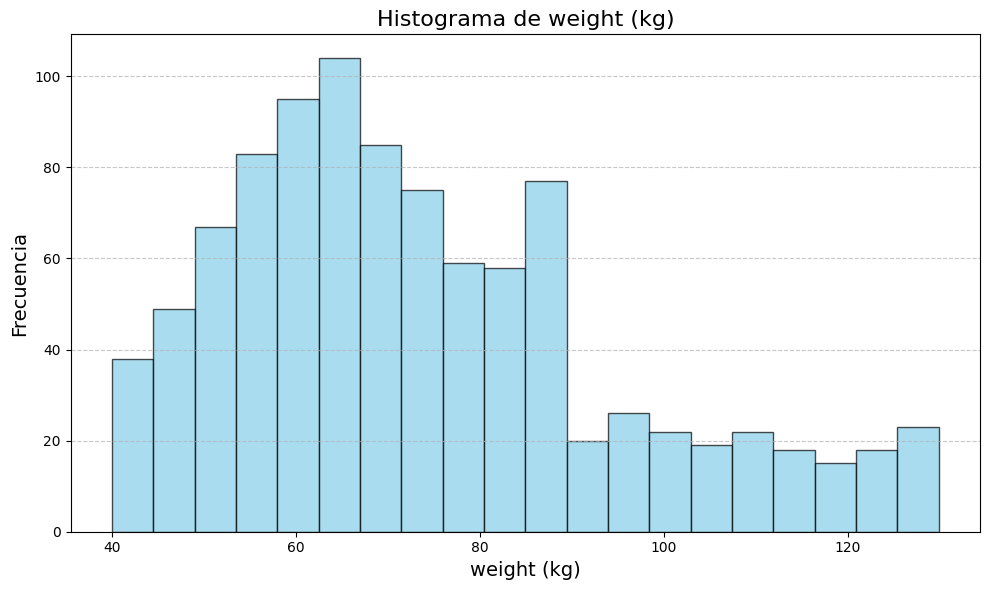

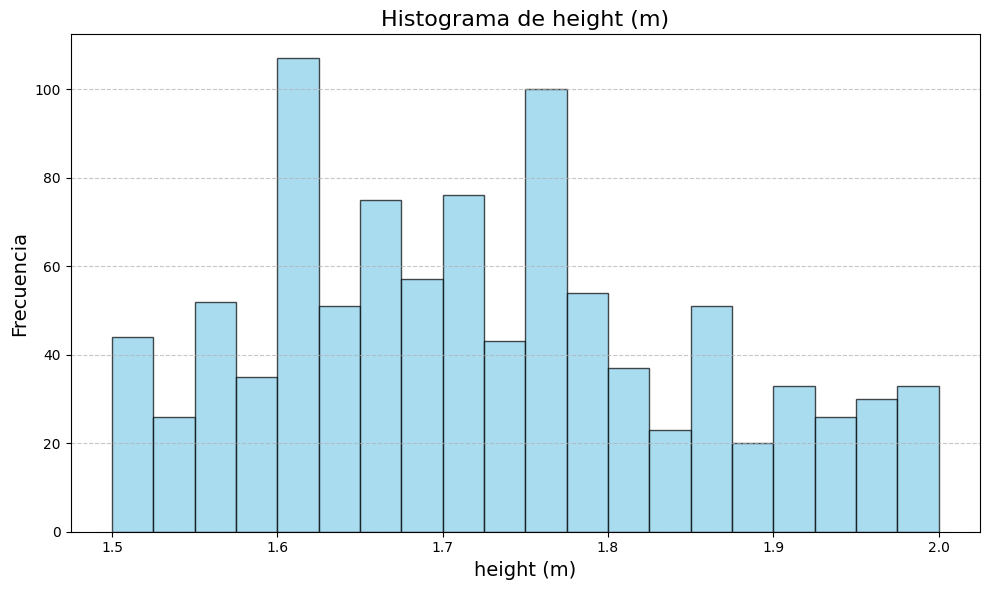

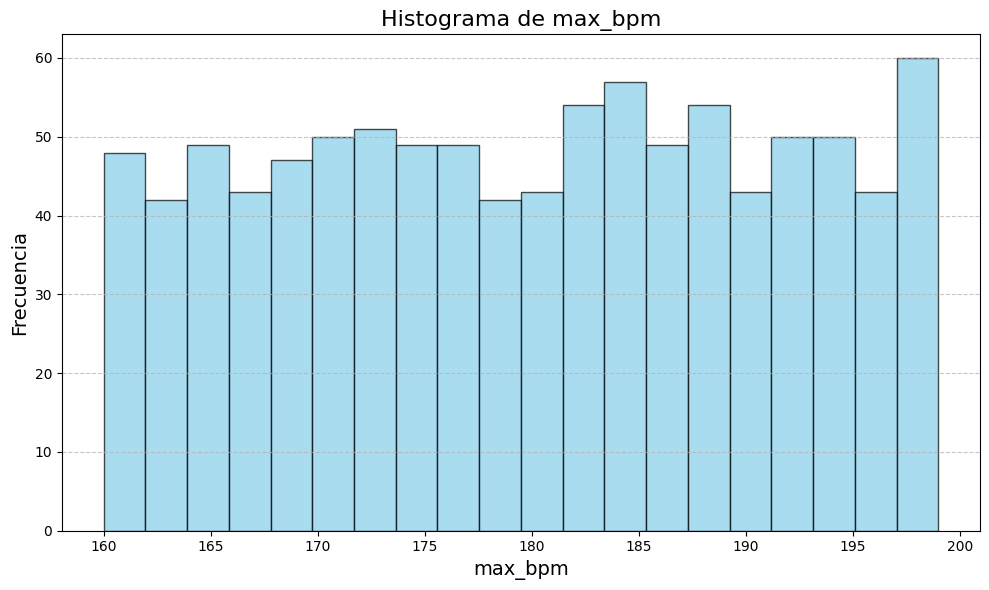

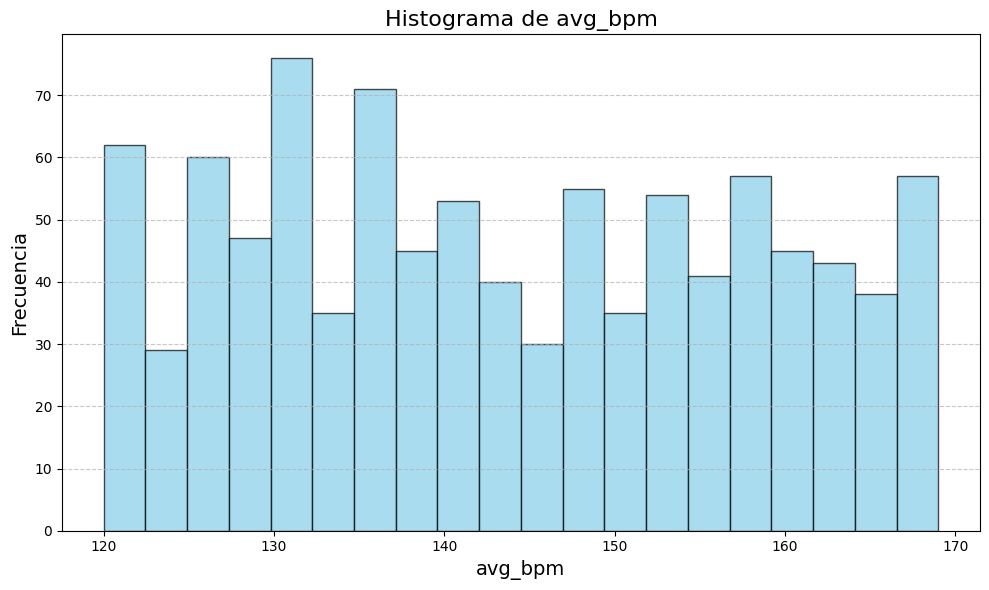

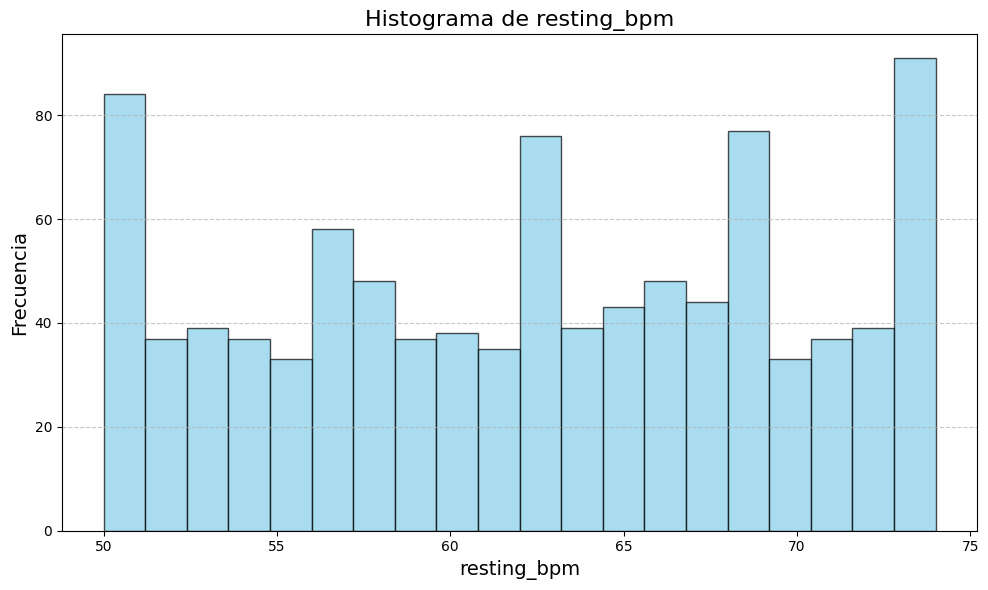

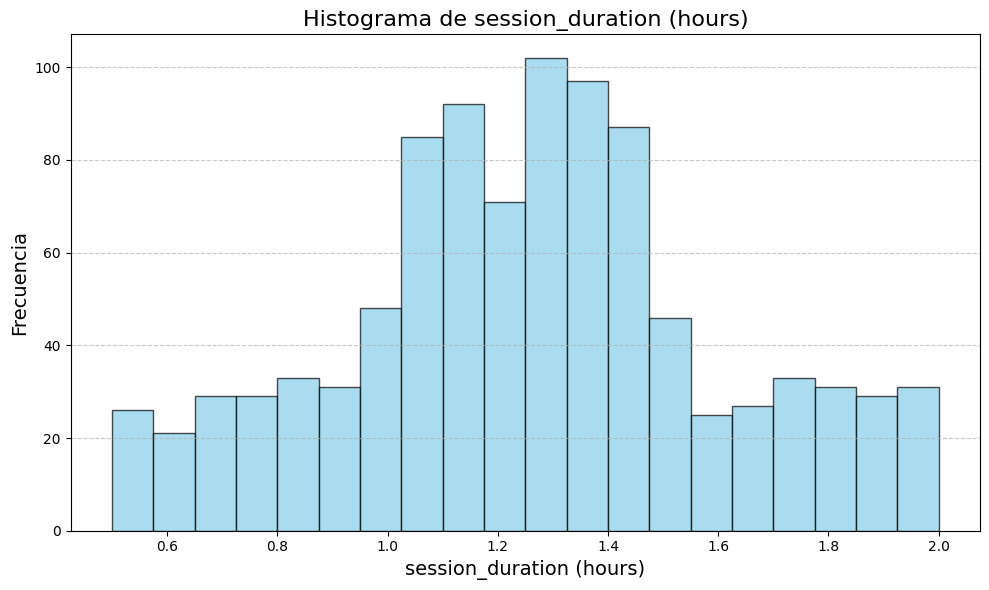

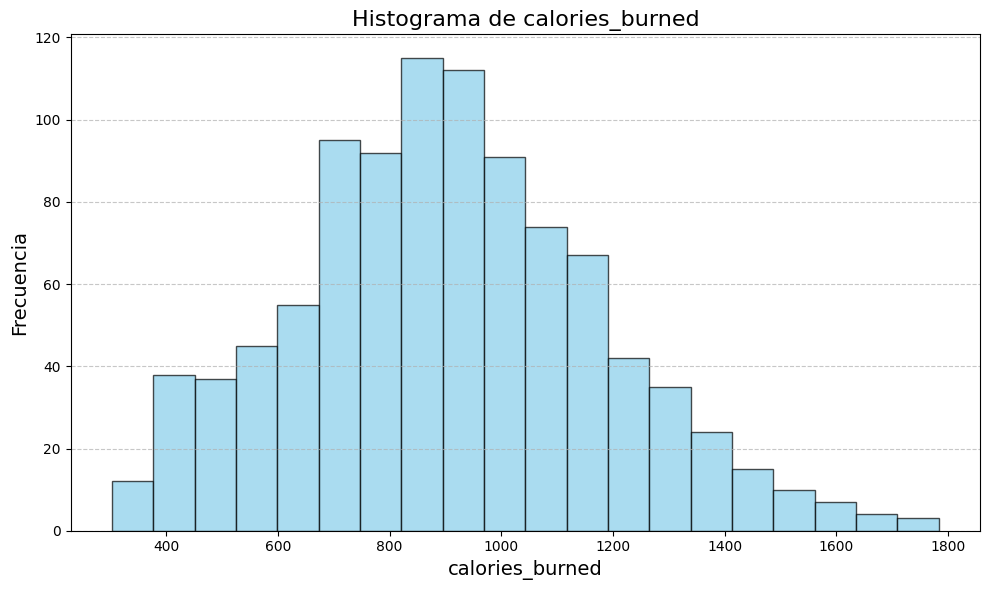

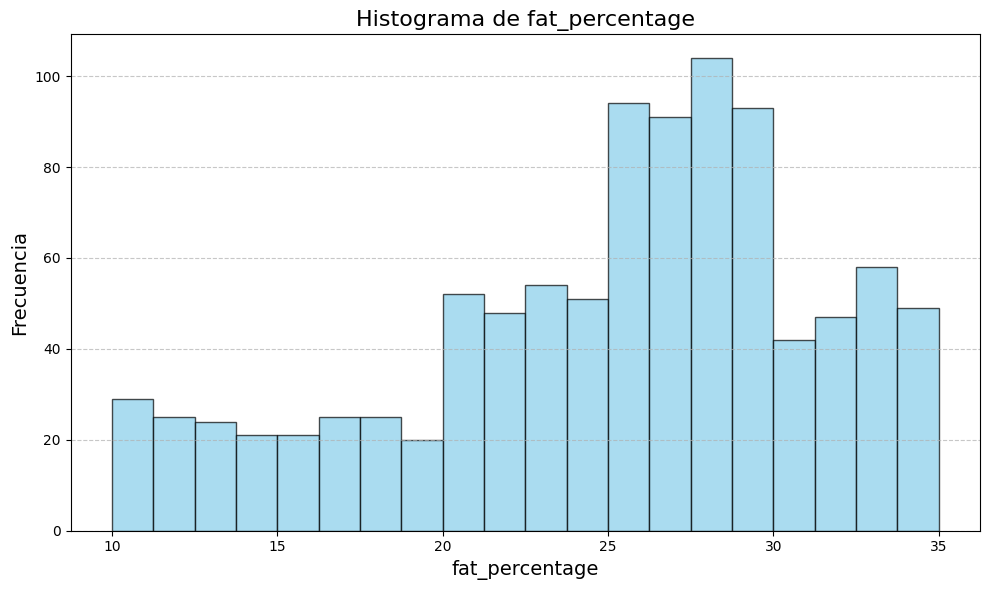

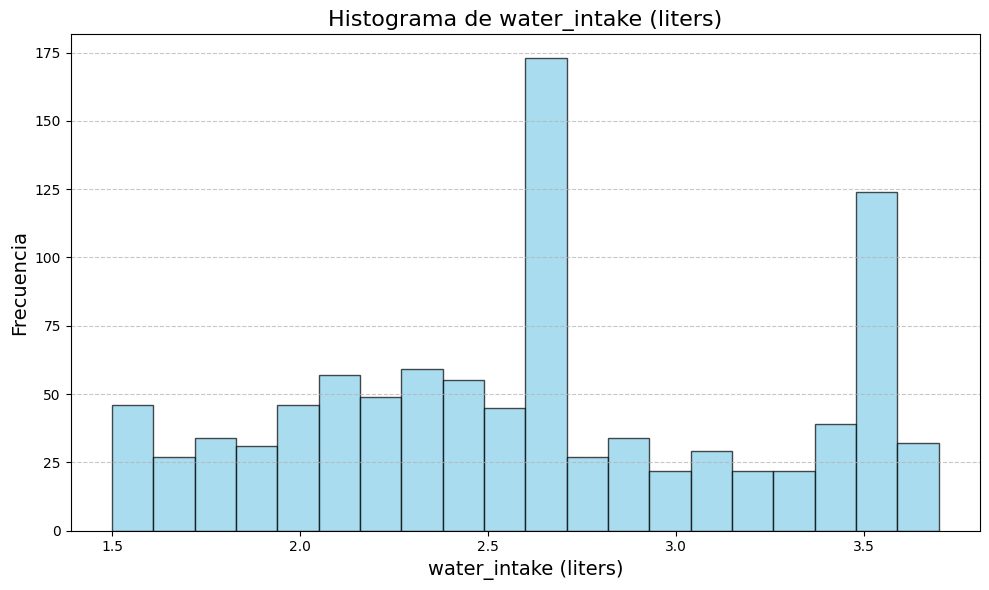

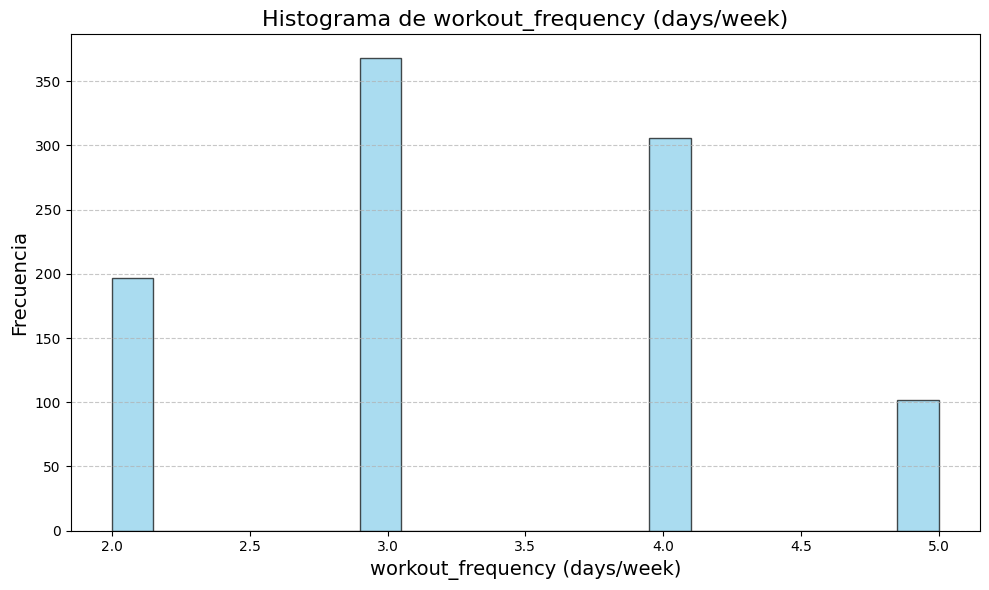

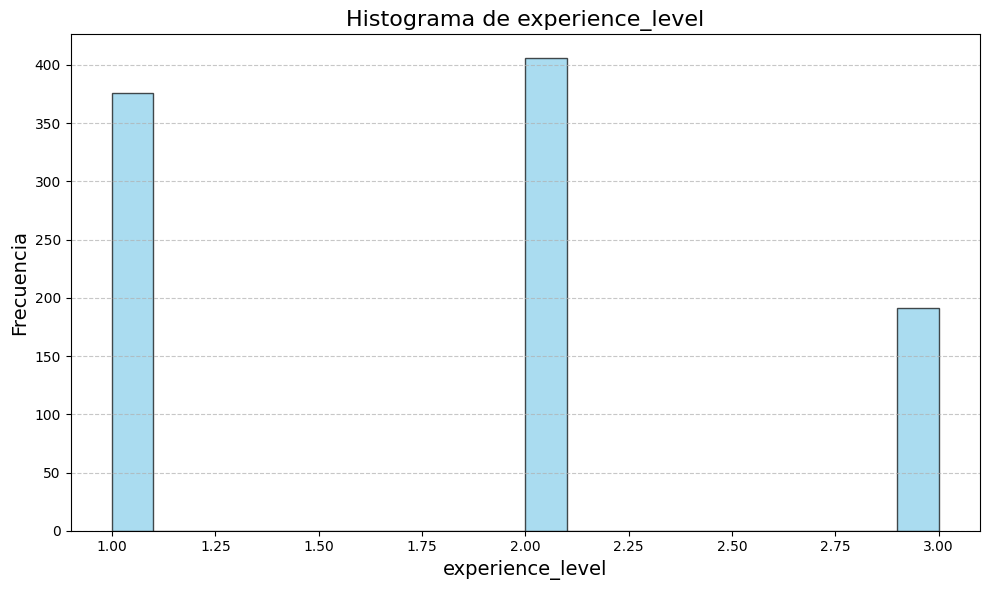

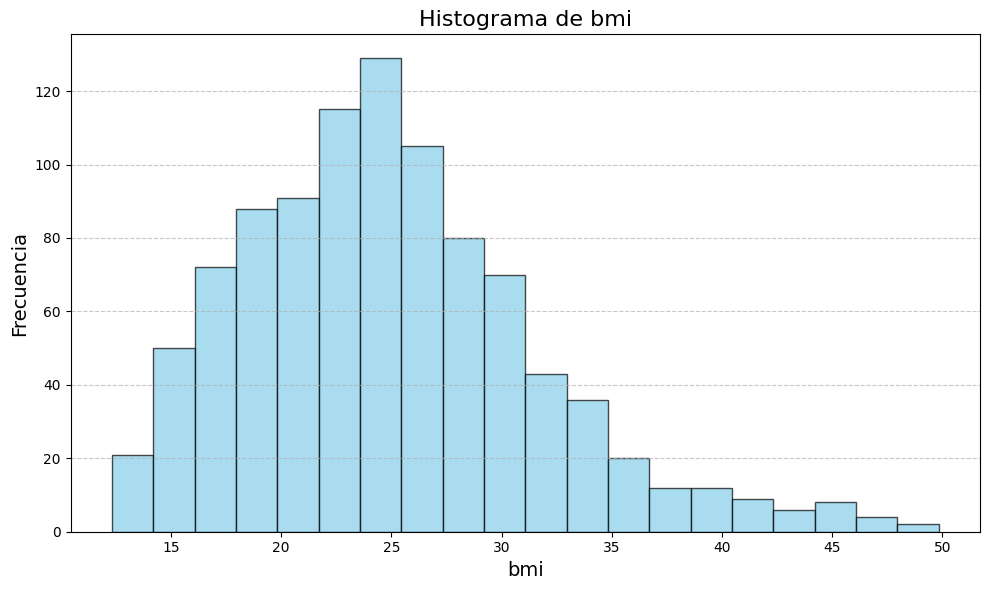

In [12]:
for num_col in num_cols_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[num_col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

    plt.title(f'Histograma de {num_col}', fontsize=16)
    plt.xlabel(f'{num_col}', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [13]:
cat_cols = []

for c in df.columns:
    if df[c].dtype == 'object':
        cat_cols.append(c)

cat_cols

['gender', 'workout_type']

In [14]:
# Crear una variable target categórica basada en Calories_Burned
df['Calories_Burned_Range'] = pd.cut(df['calories_burned'], bins=[0, 600, 1000, 1400, 2000],
                                     labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Variables categóricas relevantes
cat_cols = ['gender', 'workout_type', 'experience_level', 'workout_frequency (days/week)']

# Aplicar la prueba Chi-Cuadrado
chi2_results = {}
for col in cat_cols:
    contingency = pd.crosstab(df[col], df['Calories_Burned_Range'])  # Relación entre variable y target
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results[col] = {'Chi2': chi2, 'P-Value': p}



In [15]:
# Crear un DataFrame con los resultados
chi2_df = pd.DataFrame(chi2_results).T  # Transponer para visualización más clara
chi2_df.columns = ['Chi2', 'P-Value']  # Renombrar columnas
print(chi2_df)

                                     Chi2        P-Value
gender                          23.096711   3.855130e-05
workout_type                     8.899924   4.465630e-01
experience_level               618.793229  2.058572e-130
workout_frequency (days/week)  362.389847   1.426707e-72


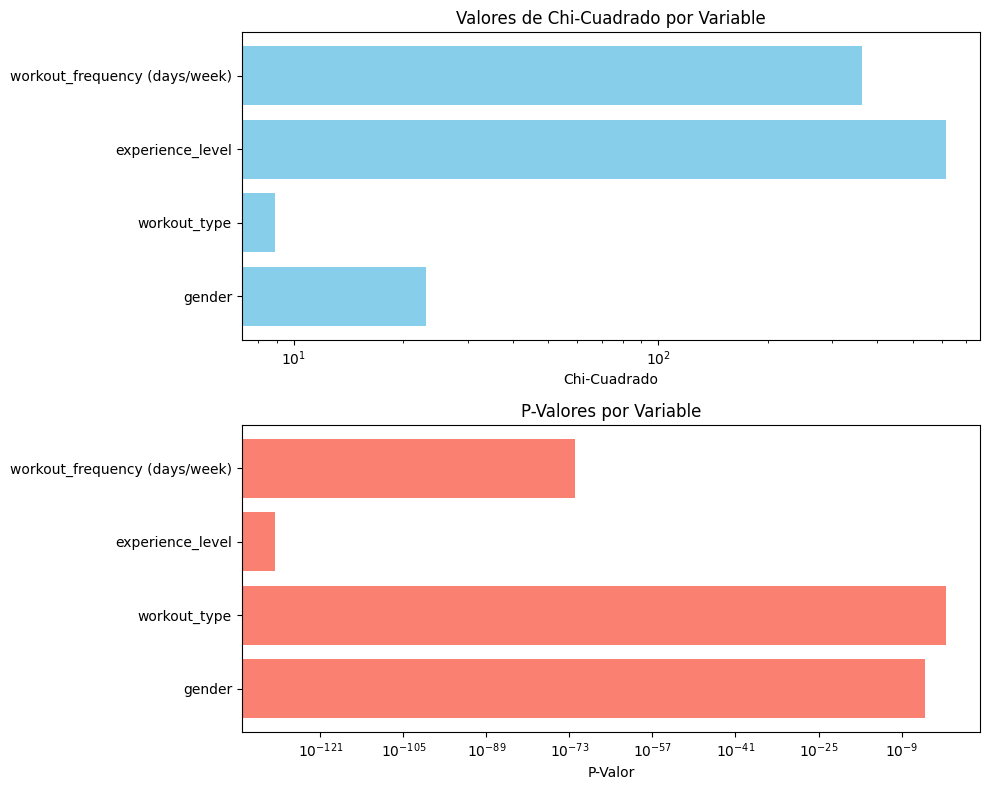

In [16]:
# Extraer las variables, valores de Chi-Cuadrado y p-valores desde los resultados
variables = list(chi2_results.keys())  # Nombres de las variables categóricas
chi2_values = [result['Chi2'] for result in chi2_results.values()]  # Valores Chi-Cuadrado
p_values = [result['P-Value'] for result in chi2_results.values()]  # P-valores

# Crear gráficos de barra para visualizar los resultados
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Chi-Cuadrado
ax[0].barh(variables, chi2_values, color='skyblue')
ax[0].set_title('Valores de Chi-Cuadrado por Variable')
ax[0].set_xlabel('Chi-Cuadrado')
ax[0].set_xscale('log')  # Escala logarítmica para valores amplios

# Gráfico de P-Valores
ax[1].barh(variables, p_values, color='salmon')
ax[1].set_title('P-Valores por Variable')
ax[1].set_xlabel('P-Valor')
ax[1].set_xscale('log')  # Escala logarítmica para resaltar valores pequeños

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [17]:
# Definir las columnas categóricas relevantes en tu dataset
cat_cols = ['gender', 'workout_type', 'experience_level', 'workout_frequency (days/week)']

# Calcular las frecuencias para obtener distribuciones probabilísticas
prob_freq = df.groupby(cat_cols, as_index=False).agg({
    "calories_burned": "count"  # Cambiar "individual" por una columna relevante en tu dataset
})

# Renombrar las columnas para mayor claridad
prob_freq.columns = cat_cols + ['frequency']
prob_freq['probability'] = prob_freq['frequency'] / df.shape[0]  # Calcular la probabilidad dividiendo entre el total de registros

# Mostrar el resultado
print(prob_freq)


    gender workout_type  experience_level  workout_frequency (days/week)  \
0   Female       Cardio                 1                              2   
1   Female       Cardio                 1                              3   
2   Female       Cardio                 2                              3   
3   Female       Cardio                 2                              4   
4   Female       Cardio                 3                              4   
5   Female       Cardio                 3                              5   
6   Female         HIIT                 1                              2   
7   Female         HIIT                 1                              3   
8   Female         HIIT                 2                              3   
9   Female         HIIT                 2                              4   
10  Female         HIIT                 3                              4   
11  Female         HIIT                 3                              5   
12  Female  

Parte 3

In [18]:
# Paso 1: Probabilidades categóricas
cat_cols = ['gender', 'workout_type', 'experience_level', 'workout_frequency (days/week)']
num_cols = ['calories_burned', 'bmi', 'session_duration (hours)', 'max_bpm', 'resting_bpm']

# Calcular frecuencias y probabilidades
prob_freq = df.groupby(cat_cols, as_index=False).agg({
    "calories_burned": "count"  # Usamos una columna numérica como referencia para el conteo
})
prob_freq.columns = cat_cols + ['frequency']
prob_freq['probability'] = prob_freq['frequency'] / prob_freq['frequency'].sum()

# Verificar las probabilidades calculadas
print("Probabilidades categóricas:")
print(prob_freq.head())

Probabilidades categóricas:
   gender workout_type  experience_level  workout_frequency (days/week)  \
0  Female       Cardio                 1                              2   
1  Female       Cardio                 1                              3   
2  Female       Cardio                 2                              3   
3  Female       Cardio                 2                              4   
4  Female       Cardio                 3                              4   

   frequency  probability  
0         32     0.032888  
1         27     0.027749  
2         18     0.018499  
3         27     0.027749  
4          9     0.009250  


In [19]:
# Paso 2: Simular categorías basadas en probabilidades para 100,000 registros
n_samples = 100000
expanded_categories = prob_freq.sample(
    n=n_samples,
    replace=True,
    weights='probability',
    random_state=42
)

In [20]:
# Paso 3: Generar valores numéricos para las columnas relevantes
numeric_data = {}
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    # Simular datos numéricos usando una distribución normal
    numeric_data[col] = np.random.normal(loc=mean, scale=std, size=n_samples)

# Convertir datos numéricos simulados a un DataFrame
numeric_data_df = pd.DataFrame(numeric_data)

# Combinar datos categóricos y numéricos
expanded_df = pd.concat([expanded_categories.reset_index(drop=True), numeric_data_df], axis=1)

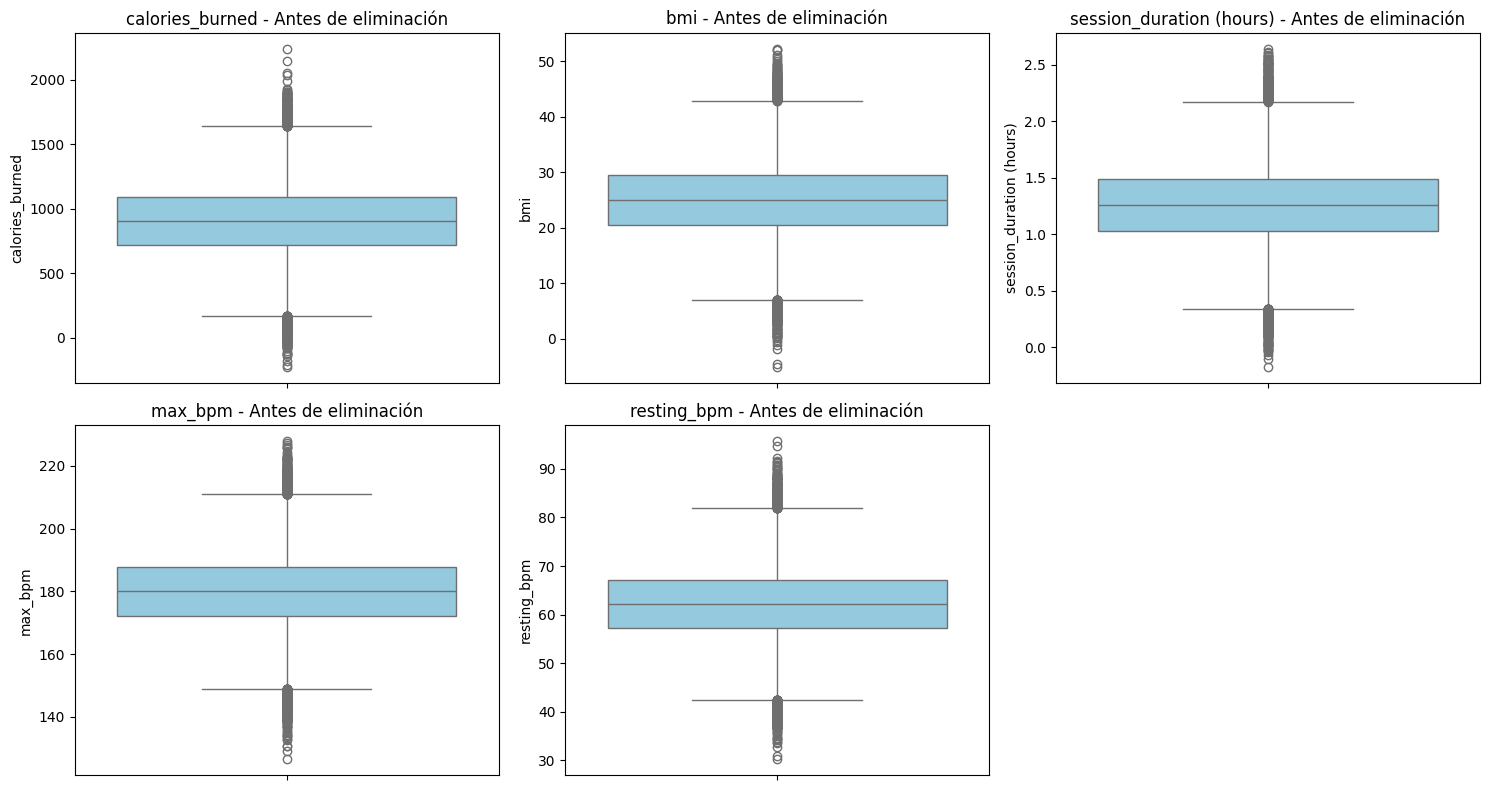

In [21]:
# Paso 4: Visualizar boxplots antes de eliminar valores atípicos
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.boxplot(data=expanded_df, y=col, color='skyblue')
    plt.title(f'{col} - Antes de eliminación')
plt.tight_layout()
plt.show()

In [22]:
registros_antes = expanded_df.shape[0]
print(f"Registros antes de eliminar valores atípicos: {registros_antes}")

Registros antes de eliminar valores atípicos: 100000


In [23]:
# Paso 5: Eliminar valores atípicos utilizando límites por IQR

for col in num_cols:
    lower_bound = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper_bound = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    expanded_df = expanded_df[(expanded_df[col] >= lower_bound) & (expanded_df[col] <= upper_bound)]
    

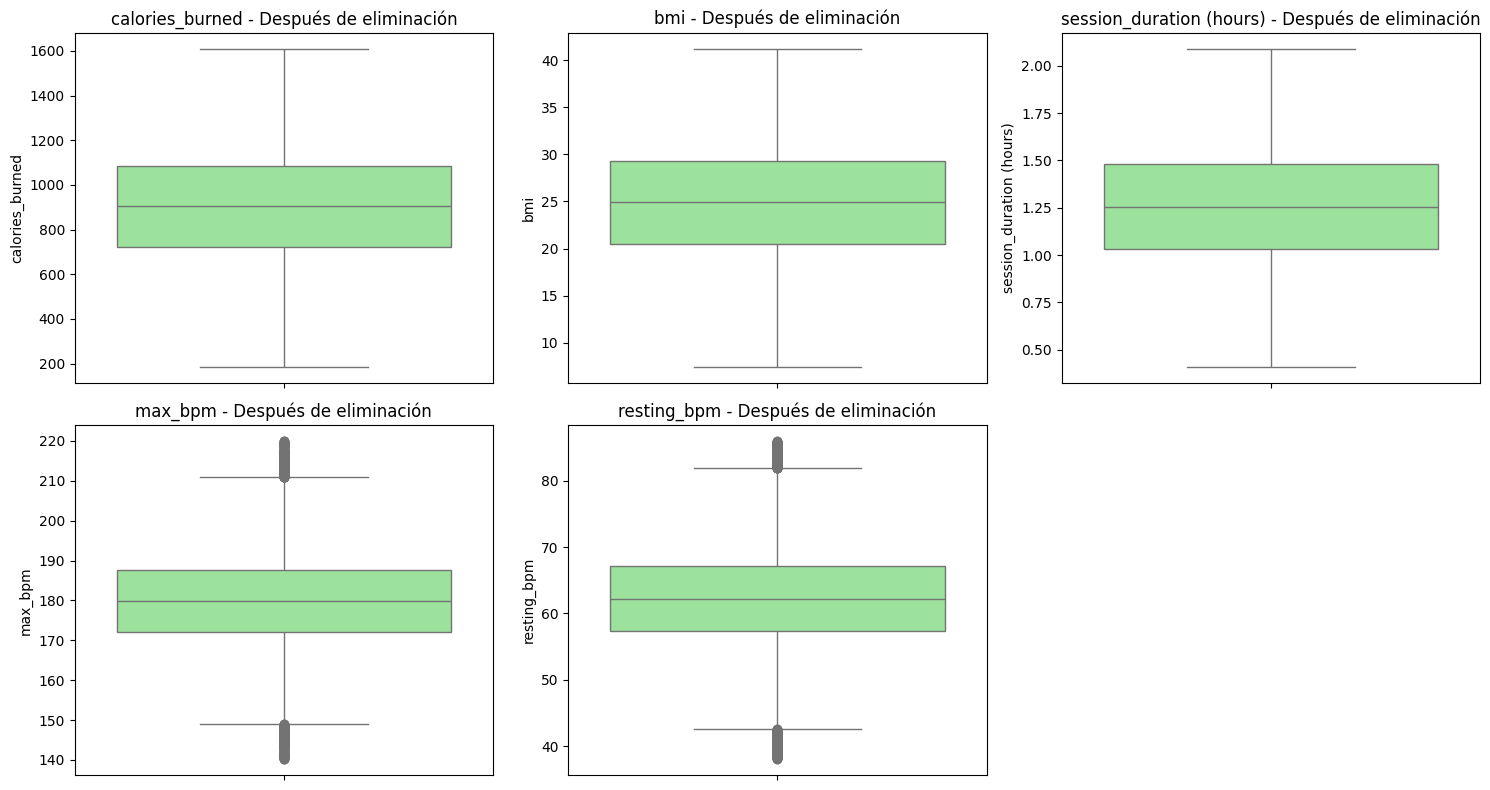

In [24]:
# Paso 6: Visualizar boxplots después de la eliminación de valores atípicos
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.boxplot(data=expanded_df, y=col, color='lightgreen')
    plt.title(f'{col} - Después de eliminación')
plt.tight_layout()
plt.show()

In [25]:

registros_despues = expanded_df.shape[0]
print(f"Registros después de eliminar valores atípicos: {registros_despues}")

Registros después de eliminar valores atípicos: 96303


In [26]:
# Validación final: Verificar el tamaño del dataset y mostrar algunos registros
print(f"Tamaño final del dataset expandido: {expanded_df.shape[0]} registros")
print(expanded_df.head())

Tamaño final del dataset expandido: 96303 registros
   gender workout_type  experience_level  workout_frequency (days/week)  \
1    Male         Yoga                 2                              4   
2    Male     Strength                 1                              2   
3    Male       Cardio                 3                              5   
4  Female         HIIT                 1                              3   
5  Female         HIIT                 1                              3   

   frequency  probability  calories_burned        bmi  \
1         24     0.024666       863.414016  36.829649   
2         23     0.023638       681.197801  35.158147   
3         10     0.010277       763.621781  29.588751   
4         23     0.023638       990.291895  19.782565   
5         23     0.023638      1238.383346  34.527515   

   session_duration (hours)     max_bpm  resting_bpm  
1                  1.826419  171.265598    62.347742  
2                  0.980513  181.728991    6

CONCLUSION:
- La eliminacion de los valores atipicos en estos datos ha normalizado las metricas claves , transformando un conjunto de datos inicialmente ruidoso y poco realista en uno util y consistente.

Parte 4

Comparación entre Dataset Original y Expandido:
                   Variable  Media (Original)  Media (Expandido)  \
0           calories_burned        905.422405         903.883940   
1                       bmi         24.912127          24.893045   
2  session_duration (hours)          1.256423           1.255722   
3                   max_bpm        179.883864         179.951678   
4               resting_bpm         62.223022          62.207048   

   Desv. Est. (Original)  Desv. Est. (Expandido)  Mínimo (Original)  \
0             272.641516              263.675959             303.00   
1               6.660879                6.367373              12.32   
2               0.343033                0.324536               0.50   
3              11.525686               11.491372             160.00   
4               7.327060                7.266028              50.00   

   Mínimo (Expandido)  Máximo (Original)  Máximo (Expandido)  
0          186.107986            1783.00         1609

,Variable,Media (Original),Media (Expandido),Desv. Est. (Original),Desv. Est. (Expandido),Mínimo (Original),Mínimo (Expandido),Máximo (Original),Máximo (Expandido)
0,calories_burned,905.422405,903.883940,272.641516,263.675959,303.00,186.107986,1783.00,1609.968678
1,bmi,24.912127,24.893045,6.660879,6.367373,12.32,7.437461,49.84,41.233827
2,session_duration (hours),1.256423,1.255722,0.343033,0.324536,0.50,0.410049,2.00,2.089890
3,max_bpm,179.883864,179.951678,11.525686,11.491372,160.00,140.178289,199.00,219.916724
4,resting_bpm,62.223022,62.207048,7.327060,7.266028,50.00,38.011170,74.00,85.967395


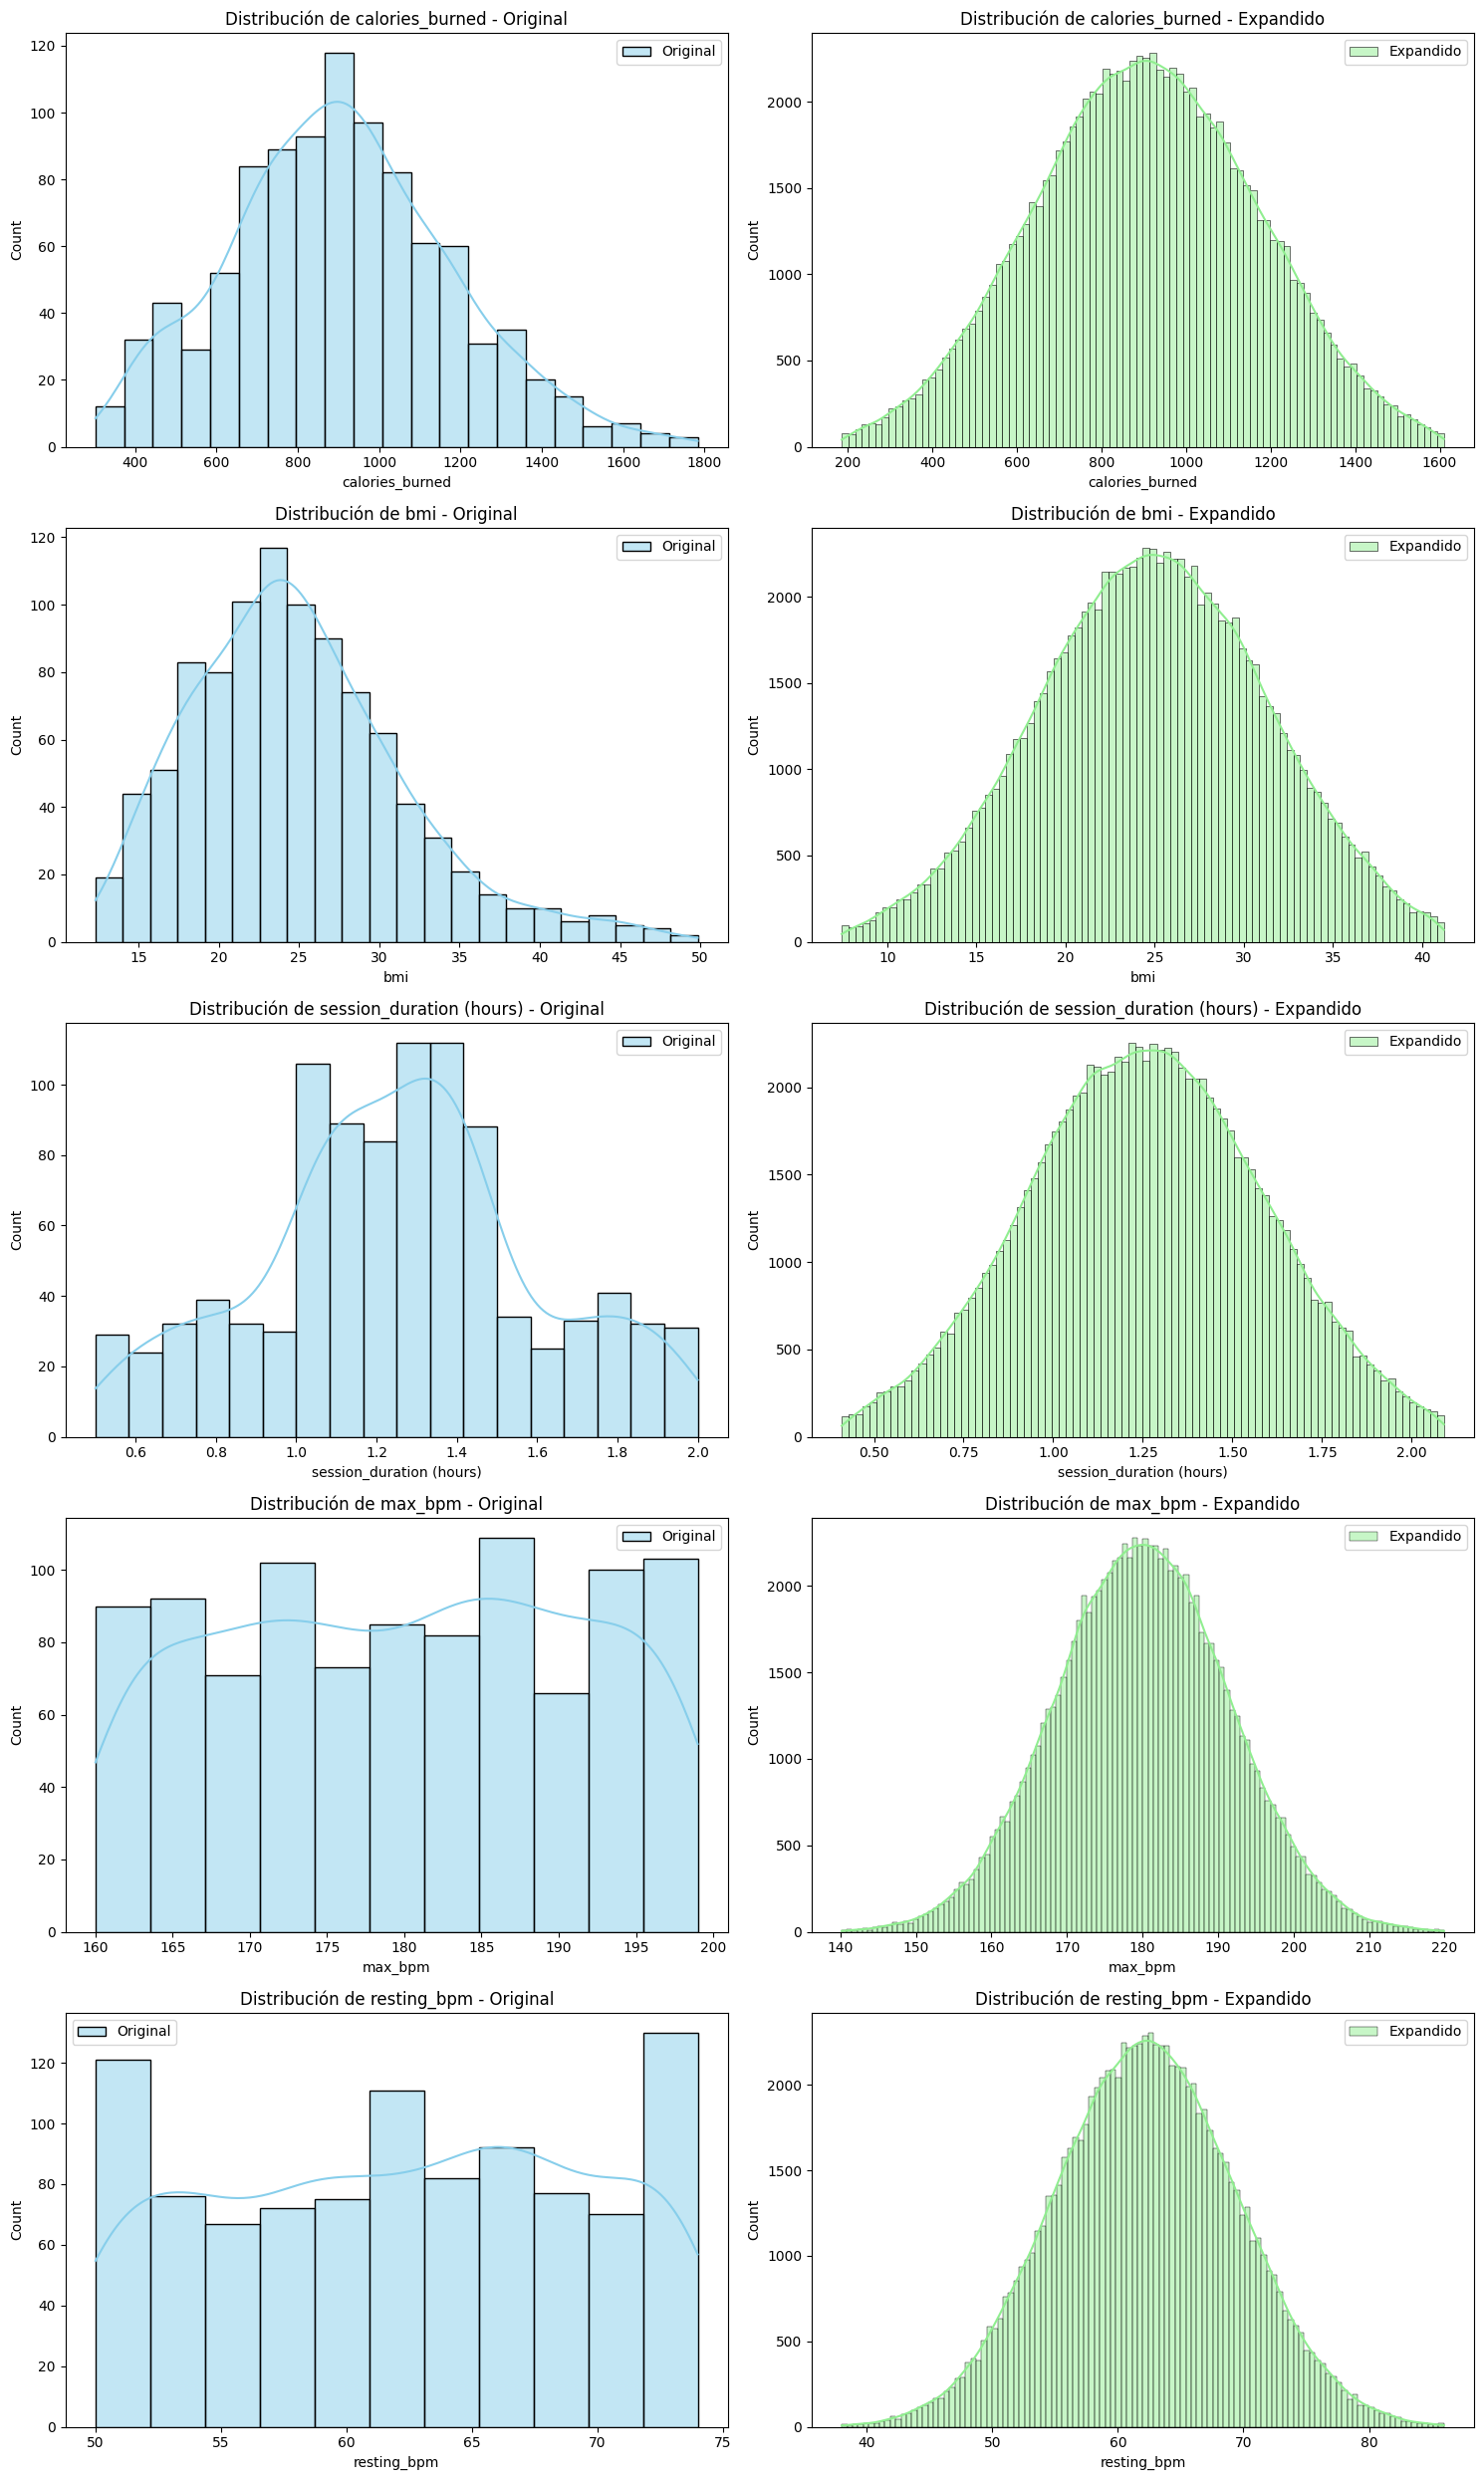

In [27]:
# Comparar estadísticas descriptivas entre el dataset original y el expandido
def comparar_descriptivas_en_tabla(original, expandido, num_cols):
    comparacion = pd.DataFrame({
        "Variable": num_cols,
        "Media (Original)": original[num_cols].mean().values,
        "Media (Expandido)": expandido[num_cols].mean().values,
        "Desv. Est. (Original)": original[num_cols].std().values,
        "Desv. Est. (Expandido)": expandido[num_cols].std().values,
        "Mínimo (Original)": original[num_cols].min().values,
        "Mínimo (Expandido)": expandido[num_cols].min().values,
        "Máximo (Original)": original[num_cols].max().values,
        "Máximo (Expandido)": expandido[num_cols].max().values
    })
    return comparacion

# Generar la tabla comparativa
tabla_comparativa = comparar_descriptivas_en_tabla(df, expanded_df, num_cols)
print("Comparación entre Dataset Original y Expandido:")
print(tabla_comparativa)

# Exportar a CSV para análisis adicional
tabla_comparativa.to_csv("comparacion_datasets.csv", index=False)

# Visualización en el entorno de Jupyter Notebook (si lo estás usando)
from IPython.display import display
display(tabla_comparativa)

# Comparar distribuciones numéricas en histogramas
plt.figure(figsize=(15, len(num_cols) * 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2 * i - 1)
    sns.histplot(df[col], kde=True, color='skyblue', label='Original')
    plt.title(f'Distribución de {col} - Original')
    plt.legend()

    plt.subplot(len(num_cols), 2, 2 * i)
    sns.histplot(expanded_df[col], kde=True, color='lightgreen', label='Expandido')
    plt.title(f'Distribución de {col} - Expandido')
    plt.legend()
plt.tight_layout()
plt.show()


CONCLUSIÓN:
- Los datos expandidos muestran una ligera reducción en la variabilidad (desviación estándar más baja en todas las variables) y valores extremos (mínimos y máximos) menos pronunciados, lo que sugiere un proceso de expansión que suavizó los datos originales.

- Las medias se mantuvieron prácticamente iguales en todos los casos, lo que indica que la expansión no alteró la tendencia central.

- La desviación estándar disminuyó ligeramente en todas las variables, sugiriendo que los datos expandidos son más "suaves".

- Los valores mínimos y máximos se ajustaron, posiblemente para corregir mediciones erróneas o incluir casos realistas pero antes excluidos.

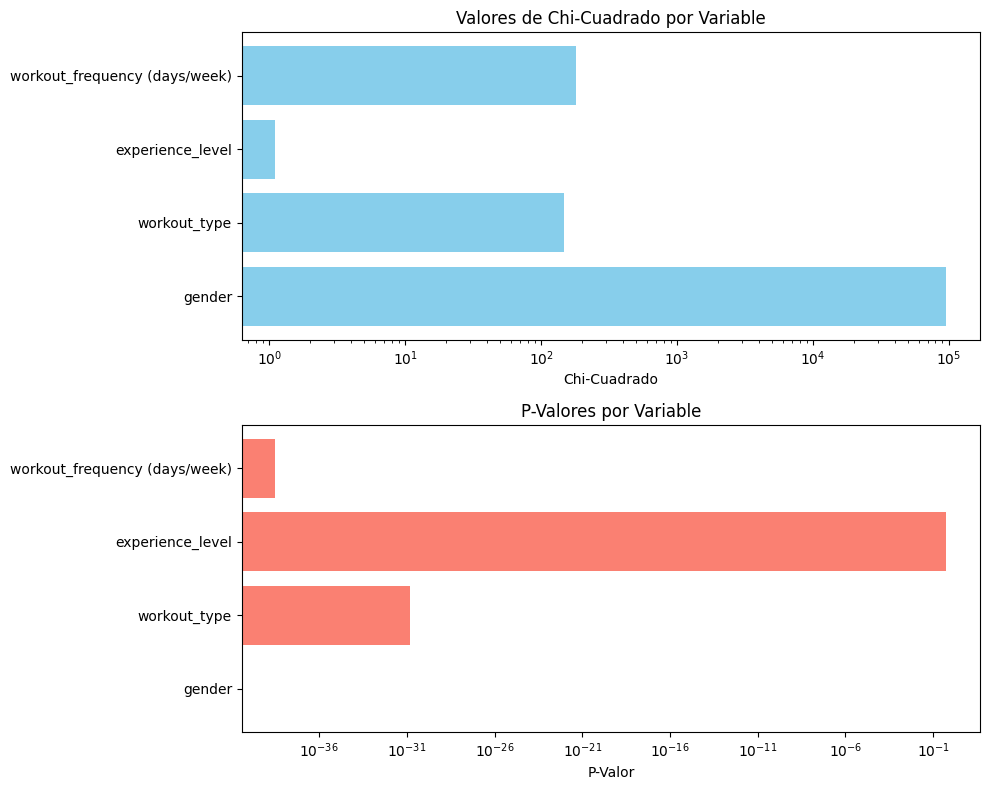

                        Variable          Chi2       P-Value
0                         gender  96298.989286  0.000000e+00
3  workout_frequency (days/week)    182.090399  3.119044e-39
1                   workout_type    146.622461  1.410294e-31
2               experience_level      1.107175  5.748836e-01


In [28]:
# Realizar análisis Chi-Cuadrado para variables categóricas en el dataset expandido
chi2_results = {}
for col in cat_cols:
    contingency_table = pd.crosstab(expanded_df[col], expanded_df['gender'])  # Ejemplo con 'gender' como variable base
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {"Chi2": chi2, "P-Value": p}

# Extraer los resultados
variables = list(chi2_results.keys())  # Nombres de las variables categóricas
chi2_values = [result['Chi2'] for result in chi2_results.values()]  # Valores Chi-Cuadrado
p_values = [result['P-Value'] for result in chi2_results.values()]  # P-valores

# Crear gráficos de barra para visualizar los resultados
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Chi-Cuadrado
ax[0].barh(variables, chi2_values, color='skyblue')
ax[0].set_title('Valores de Chi-Cuadrado por Variable')
ax[0].set_xlabel('Chi-Cuadrado')
ax[0].set_xscale('log')  # Escala logarítmica para valores amplios

# Gráfico de P-Valores
ax[1].barh(variables, p_values, color='salmon')
ax[1].set_title('P-Valores por Variable')
ax[1].set_xlabel('P-Valor')
ax[1].set_xscale('log')  # Escala logarítmica para resaltar valores pequeños

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Mostrar resultados en tabla
resultados_chi2 = pd.DataFrame({
    "Variable": variables,
    "Chi2": chi2_values,
    "P-Value": p_values
}).sort_values(by="P-Value")
print(resultados_chi2)


CONCLUSIÓN:
El análisis de Chi-Cuadrado confirma que el dataset expandido logró:

- Mantener relaciones estadísticas importantes entre variables categóricas similares al dataset original.

- Preservar la significancia estadística de varias variables clave (gender, workout_type, etc.), lo que indica que la simulación respetó las distribuciones originales.

- Sin embargo, si algunas variables tienen P-Valores más altos (más de 0.05), estas relaciones podrían haber sido suavizadas durante la simulación. Esto puede ser aceptable dependiendo del objetivo del análisis, pero podría ser un área para ajustar en futuros procesos de simulación.

CONCLUSIÓN GENERAL DEL PROYECTO:

- El proyecto mostró cómo expandir un dataset usando simulación, manteniendo las distribuciones originales y eliminando valores atípicos para que los datos generados sean lo más realistas posibles. A través del EDA, se seleccionaron las variables clave y se aplicaron técnicas para crear un dataset más grande, pero con características estadísticas similares al original. Esto demuestra que se puede generar un conjunto de datos mucho más robusto sin perder calidad, lo que hace que las simulaciones sean útiles y representativas para análisis futuros.

- La comparación entre el dataset original y el expandido muestra que la simulación ha logrado mantener la distribución de las variables. Las diferencias en medias y desviaciones estándar son mínimas, mientras que los valores mínimos y máximos presentan ligeras variaciones, pero aún así, los datos simulados conservan las características clave del conjunto original, lo que demuestra la efectividad del proceso de expansión.